### 주어진 영상에 대하여 팽창, 침식, 열림, 닫기 연산을 위한 함수를 구현

In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()

주어진 영상을 읽고 가시화

In [3]:
!wget https://www.shrednations.com/wp-content/uploads/corporate-espionage.jpg

--2021-10-26 10:03:16--  https://www.shrednations.com/wp-content/uploads/corporate-espionage.jpg
Resolving www.shrednations.com (www.shrednations.com)... 173.255.203.102
Connecting to www.shrednations.com (www.shrednations.com)|173.255.203.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 476829 (466K) [image/jpeg]
Saving to: ‘corporate-espionage.jpg’

corporate-espionage 100%[===================>] 465.65K  --.-KB/s    in 0.1s    

2021-10-26 10:03:16 (3.20 MB/s) - ‘corporate-espionage.jpg’ saved [476829/476829]



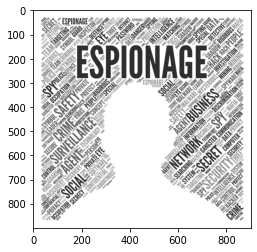

900 900


In [4]:
img = cv2.imread('corporate-espionage.jpg', 0)
plt.imshow(img, 'gray')
plt.show()
height, width  = img.shape
print(width, height)

영상 이진화

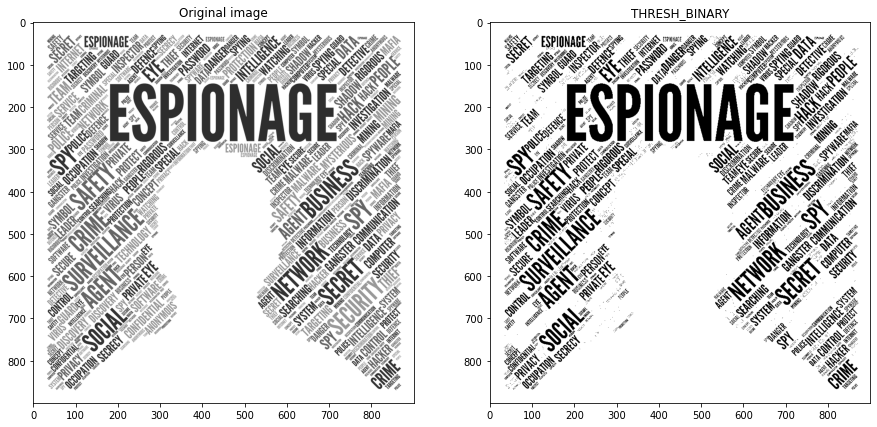

In [5]:
ret, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# Plot the images
images = [img, binary_img]
titles = ['Original image', 'THRESH_BINARY']
plot_img(images, titles)

4연결성 기준 3X3, 5X5 팽창, 침식, 열기, 닫기 함수를 구현하고 이에 대한 결과를 가시화하기
- 필터의 모양은 아래 그림을 참고하여 사용

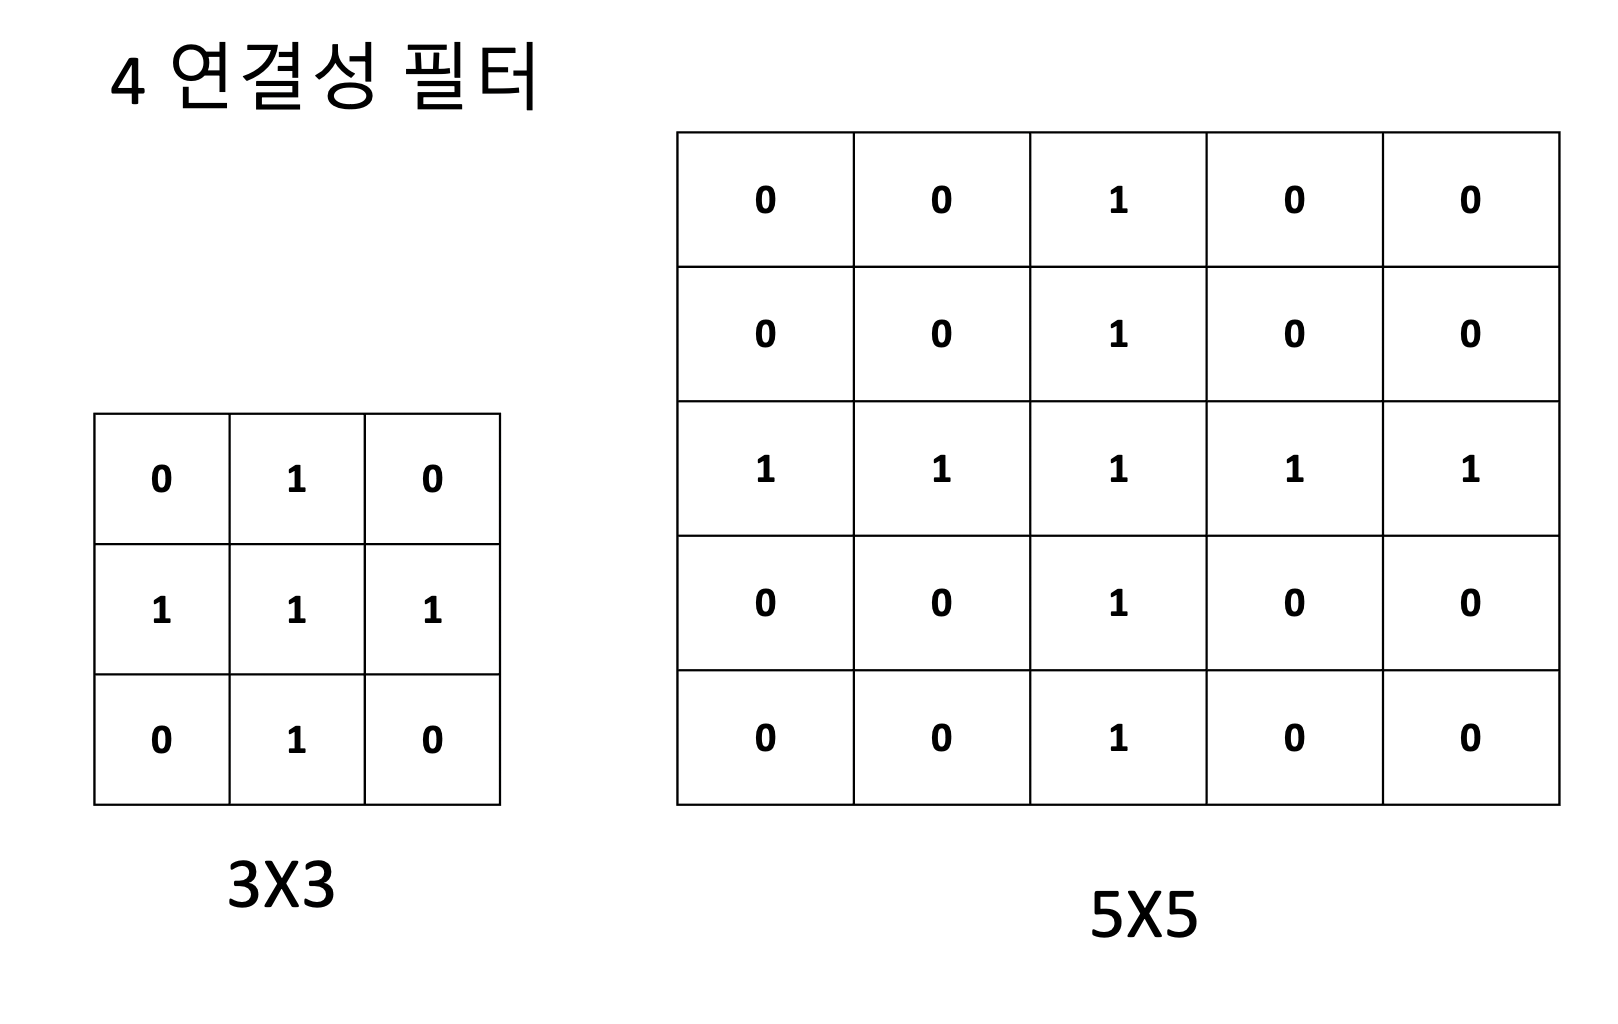

### **중요: 주어진 이진화된 영상의 검은색 부분(픽셀 값이 0인 부분)에 대하여 팽창, 침식, 열기, 닫기 과정을 수행**

In [47]:
#3x3 팽창(dilation) 함수 작성
def dilation_3x3(img):
    # 함수 작성
    height, width = img.shape

    # 입력 영상과 동일한 크기의 기본값이 255(White)인 영상 생성
    output_img = numpy.full((height, width), 255, dtype=numpy.int32)
    for i in range(1, height-1):
      for j in range(1, width-1):
        # 입력 영상에 대해 검은색 부분 팽창 (3x3) - 4연결성의 방향에 대해 0인 경우 이웃한 네 방향으로 1 Fixel 만큼 팽창
        if img[i][j] == 0:
          output_img[i][j] = output_img[i-1][j] = output_img[i+1][j] = output_img[i][j-1] = output_img[i][j+1] = 0

    return output_img

#3x3 침식(erosion) 함수 작성
def erosion_3x3(img):
    # 함수 작성
    height, width = img.shape

    output_img = numpy.full((height, width), 255, dtype=numpy.int32)
    for i in range(1, height-1):
      for j in range(1, width-1):
        # 입력 영상에 대해 검은색 부분 침식 (3x3) - 4연결성의 방향에 대해 모두 0인 경우는 침식되지 않고 하나라도 0이 아닌 경우는 침식
        if img[i][j] == 0 and (img[i+1][j] == img[i-1][j] == img[i][j+1] == img[i][j-1] == 0):
          output_img[i][j] = 0
        else:
          output_img[i][j] = 255

    return output_img

#3x3 열기(open) 함수 작성
def open_3x3(img):
    # 함수 작성
    
    # 모폴로지 연산 중 '열기'는 침식 -> 팽창 연산과 같기 때문에 위에서 구현한 함수를 순서에 맞게 호출 (잡음 제거에 유용)
    return dilation_3x3(erosion_3x3(img))

#3x3 닫기(close) 함수 작성
def close_3x3(img):
    # 함수 작성
    
    # 모폴로지 연산 중 '닫기'는 팽창 -> 침식 연산과 같기 때문에 위에서 구현한 함수를 순서에 맞게 호출 (홀을 메꿀 수 있음)
    return erosion_3x3(dilation_3x3(img))

In [45]:
#5x5 팽창(dilation) 함수 작성
def dilation_5x5(img):
    # 함수 작성
    height, width = img.shape

    # 입력 영상과 동일한 크기의 기본값이 255(White)인 영상 생성
    output_img = numpy.full((height, width), 255, dtype=numpy.int32)
    for i in range(2, height-2):
      for j in range(2, width-2):
        # 입력 영상에 대해 검은색 부분 팽창 (5x5) - 4연결성의 방향에 대해 0인 경우 이웃한 네 방향으로 2 Fixel 만큼 팽창 (하드코딩)
        if img[i][j] == 0:
          output_img[i][j] = output_img[i-1][j] = output_img[i-2][j] = output_img[i+1][j] = output_img[i+2][j] = output_img[i][j-1] = output_img[i][j-2] = output_img[i][j+1] = output_img[i][j+2] = 0

    return output_img

#5x5 침식(erosion) 함수 작성
def erosion_5x5(img):
    # 함수 작성
    height, width = img.shape

    output_img = numpy.full((height, width), 255, dtype=numpy.int32)
    for i in range(2, height-2):
      for j in range(2, width-2):
        # 입력 영상에 대해 검은색 부분 침식 (5x5) - 4연결성의 방향에 대해 모두 0인 경우는 침식되지 않고 하나라도 0이 아닌 경우는 침식 (하드코딩)
        if img[i][j] == 0 and (img[i+1][j] == img[i+2][j] == img[i-1][j] == img[i-2][j] == img[i][j+1] == img[i][j+2] == img[i][j-1] == img[i][j-2] == 0):
          output_img[i][j] = 0
        else:
          output_img[i][j] = 255

    return output_img

#5x5 열기(open) 함수 작성
def open_5x5(img):
    # 함수 작성
    
    # 모폴로지 연산 중 '열기'는 침식 -> 팽창 연산과 같기 때문에 위에서 구현한 함수를 순서에 맞게 호출 (잡음 제거에 유용)
    return dilation_5x5(erosion_5x5(img))

#5x5 닫기(close) 함수 작성
def close_5x5(img):
    # 함수 작성
    
    # 모폴로지 연산 중 '닫기'는 팽창 -> 침식 연산과 같기 때문에 위에서 구현한 함수를 순서에 맞게 호출 (홀을 메꿀 수 있음)
    return erosion_5x5(dilation_5x5(img))

함수를 이용하여 가시화

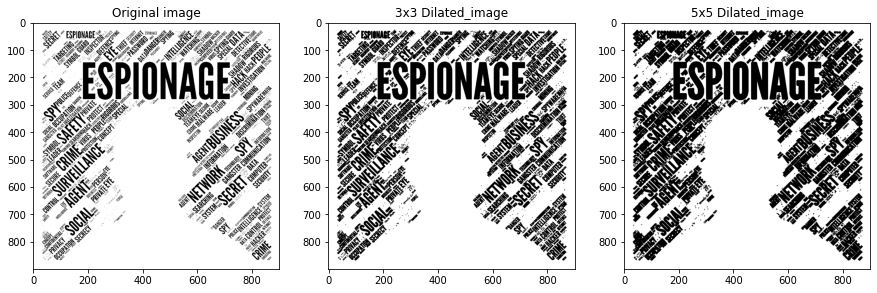

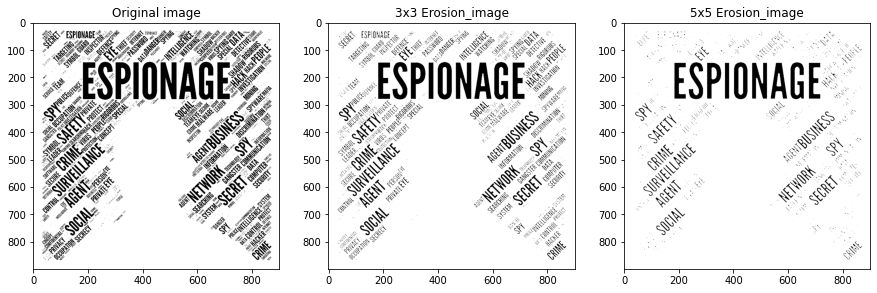

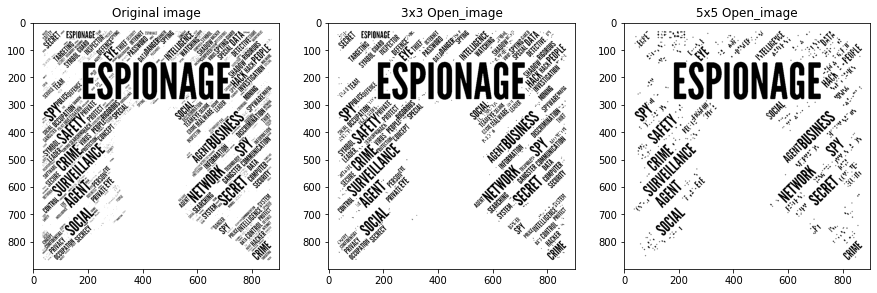

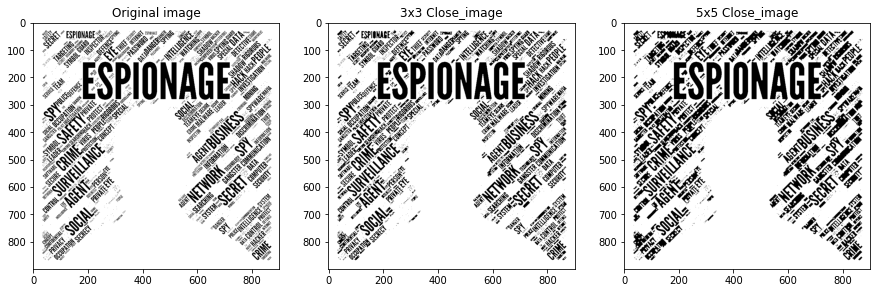

In [46]:
# 팽창(dilation) 결과 출력 (Binary image가 아닌 Gray image를 사용하고 있으므로 img > binary_img 로 수정)
dilated_img_3x3 = dilation_3x3(binary_img)
dilated_img_5x5 = dilation_5x5(binary_img)
images = [binary_img, dilated_img_3x3, dilated_img_5x5]
titles = ['Original image', '3x3 Dilated_image', '5x5 Dilated_image']
plot_img(images, titles)

# 침식(erosion) 결과 출력
erosion_img_3x3 = erosion_3x3(binary_img)
erosion_img_5x5 = erosion_5x5(binary_img)
images = [binary_img, erosion_img_3x3, erosion_img_5x5]
titles = ['Original image', '3x3 Erosion_image', '5x5 Erosion_image']
plot_img(images, titles)

# 열기(open) 결과 출력
open_img_3x3 = open_3x3(binary_img)
open_img_5x5 = open_5x5(binary_img)
images = [binary_img, open_img_3x3, open_img_5x5]
titles = ['Original image', '3x3 Open_image', '5x5 Open_image']
plot_img(images, titles)

# 닫기(close) 결과 출력
close_img_3x3 = close_3x3(binary_img)
close_img_5x5 = close_5x5(binary_img)
images = [binary_img, close_img_3x3, close_img_5x5]
titles = ['Original image', '3x3 Close_image', '5x5 Close_image']
plot_img(images, titles)